# Deep Learning with Keras and Tensorflow

# Project --- Lending Club Loan Data Analysis

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df.shape

(9578, 14)

In [4]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
df.isnull().sum()

,0
credit.policy,0
purpose,0
int.rate,0
installment,0
log.annual.inc,0
dti,0
fico,0
days.with.cr.line,0
revol.bal,0
revol.util,0


In [6]:
df['not.fully.paid'].value_counts()

,count
not.fully.paid,
0,8045
1,1533


In [7]:
#handling imbalanced dataset
not_fully_paid_0 = df[df['not.fully.paid'] == 0]
not_fully_paid_1 = df[df['not.fully.paid'] == 1]

print('not_fully_paid_0', not_fully_paid_0.shape)
print('not_fully_paid_1', not_fully_paid_1.shape)

not_fully_paid_0 (8045, 14)
not_fully_paid_1 (1533, 14)


In [8]:
#handling imbalanced data
from sklearn.utils import resample
df_minority_upsampled = resample(not_fully_paid_1, replace = True, n_samples = 8045)
new_df = pd.concat([not_fully_paid_0, df_minority_upsampled])

from sklearn.utils import shuffle
new_df = shuffle(new_df)

In [9]:
new_df['not.fully.paid'].value_counts()  #imbalanced data handled

,count
not.fully.paid,
1,8045
0,8045


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in new_df.columns:
    if new_df[i].dtypes == 'object':

        new_df[i] = le.fit_transform(new_df[i])

In [11]:
new_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
8075,0,0,0.1343,27.13,10.165852,0.00,637,540.041667,0,0.0,2,0,0,1
1899,1,2,0.0963,320.95,11.156251,6.31,737,3480.041667,20423,46.7,2,0,0,1
3229,1,2,0.1126,558.68,11.082204,4.41,762,6570.000000,1878,7.2,0,0,0,0
8563,0,2,0.1261,134.03,10.596635,20.07,677,4409.958333,15721,85.4,4,0,0,0
7960,0,1,0.1343,169.51,11.492723,12.53,647,2849.958333,9568,97.1,1,0,3,0


In [12]:
new_df.corr().abs()['not.fully.paid'].sort_values(ascending = False)

,not.fully.paid
not.fully.paid,1.000000
int.rate,0.221226
fico,0.215691
credit.policy,0.200341
inq.last.6mths,0.176159
revol.util,0.114897
purpose,0.073812
pub.rec,0.071439
revol.bal,0.065445
installment,0.064212


<Axes: >

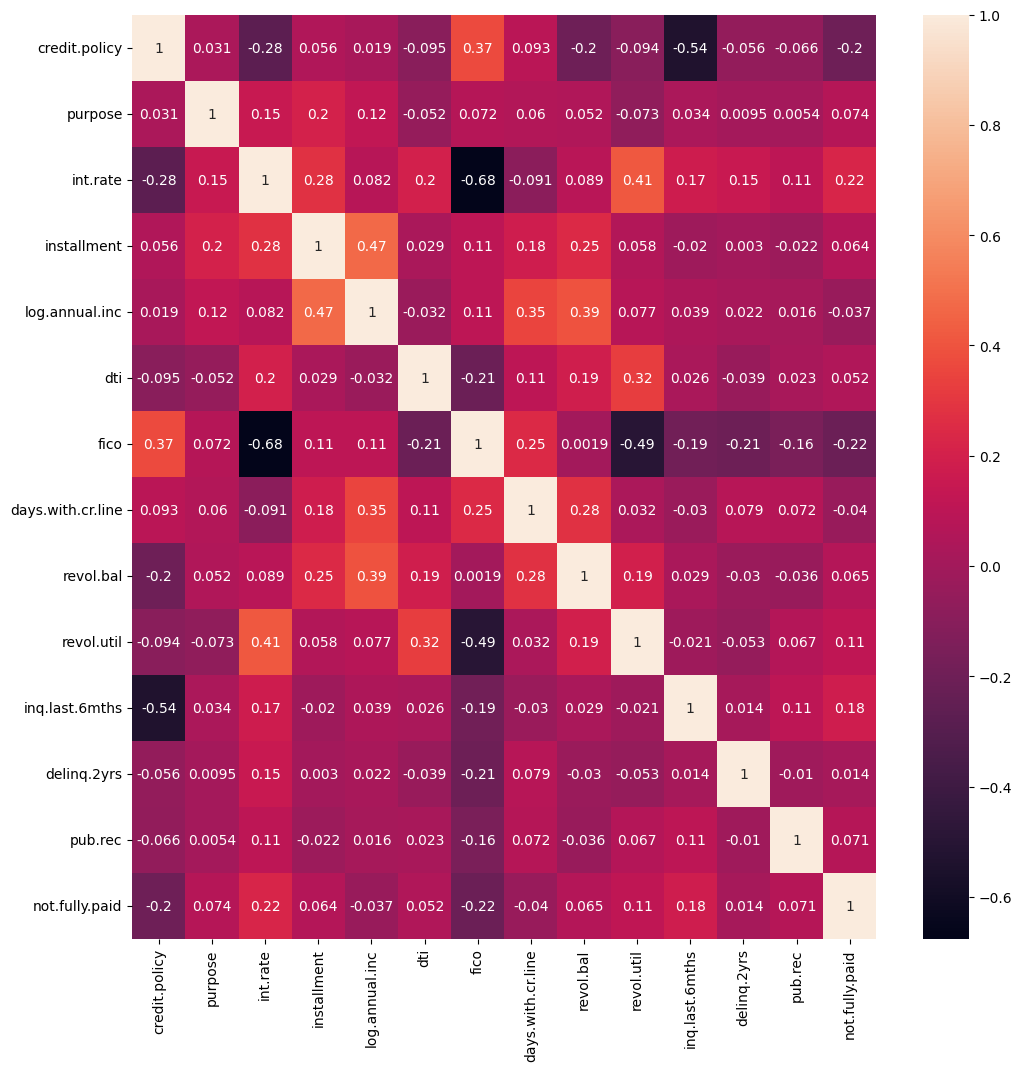

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
f,axes = plt.subplots(1,1,figsize = (12,12))
sns.heatmap(new_df.corr(), annot = True, ax = axes)

In [14]:
X = new_df[["int.rate", "fico", "credit.policy", "inq.last.6mths", "revol.util", "pub.rec", "installment", "purpose"]]
y = new_df["not.fully.paid"]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
from tensorflow import keras

model = keras.Sequential(
    [
        keras.layers.Dense(
            256, activation="relu", input_shape=[8]
        ),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,145 (524.00 KB)

 Trainable params: 134,145 (524.00 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [19]:
early_stopping = keras.callbacks.EarlyStopping(patience = 10, min_delta = 0.001,
                                               restore_best_weights =True )
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=1,
)

Epoch 1/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - binary_accuracy: 0.6028 - loss: 0.6573 - val_binary_accuracy: 0.6280 - val_loss: 0.6422
Epoch 2/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - binary_accuracy: 0.6348 - loss: 0.6354 - val_binary_accuracy: 0.6408 - val_loss: 0.6381
Epoch 3/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - binary_accuracy: 0.6359 - loss: 0.6328 - val_binary_accuracy: 0.6426 - val_loss: 0.6339
Epoch 4/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - binary_accuracy: 0.6386 - loss: 0.6293 - val_binary_accuracy: 0.6408 - val_loss: 0.6309
Epoch 5/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - binary_accuracy: 0.6444 - loss: 0.6268 - val_binary_accuracy: 0.6504 - val_loss: 0.6297
Epoch 6/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - binary_accuracy: 0.6411 - loss: 0.6281 - val_binary_accuracy: 0.6411 - val_loss: 0.6289
Epoch 7/1000
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - binary_accuracy: 0.6433 - loss: 0.6245 - val_binary_accuracy: 0.6485 - val_loss: 0.6230

In [20]:
predictions =(model.predict(X_test)>0.5).astype("int32")

predictions

101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [0]], dtype=int32)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test, predictions)

0.8349906774394034

In [22]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1615
           1       0.80      0.89      0.84      1603

    accuracy                           0.83      3218
   macro avg       0.84      0.84      0.83      3218
weighted avg       0.84      0.83      0.83      3218

